In [ ]:
# ===============================
# CityPulse - AI Scoring (Colab)
# ===============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------------
# 1. Create Synthetic Dataset
# -------------------------------
np.random.seed(42)

n = 300
data = {
    "green_cover": np.random.uniform(10, 60, n),        # percentage
    "traffic_congestion": np.random.uniform(10, 120, n), # min/km delay
    "waste_generation": np.random.uniform(0.2, 2.5, n), # kg/person/day
    "energy_consumption": np.random.uniform(500, 3000, n), # kWh/person/year
}

df = pd.DataFrame(data)

# Formula for City Health Score (synthetic)
df["city_health_score"] = (
    0.4 * df["green_cover"]
    - 0.3 * df["traffic_congestion"] / 10
    - 0.2 * df["waste_generation"] * 10
    - 0.1 * df["energy_consumption"] / 500
) + 50

# -------------------------------
# 2. Train-Test Split & Scaling
# -------------------------------
X = df.drop("city_health_score", axis=1)
y = df["city_health_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 3. Train Model
# -------------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
print("Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# -------------------------------
# 4. Take User Input & Predict
# -------------------------------
print("\n🔹 Enter City Parameters to Calculate AI Score:")

green_cover = float(input("Enter Green Cover (%) : "))
traffic_congestion = float(input("Enter Traffic Congestion (min/km) : "))
waste_generation = float(input("Enter Waste Generation (kg/person/day) : "))
energy_consumption = float(input("Enter Energy Consumption (kWh/person/year) : "))

# Prepare input
user_city = pd.DataFrame({
    "green_cover": [green_cover],
    "traffic_congestion": [traffic_congestion],
    "waste_generation": [waste_generation],
    "energy_consumption": [energy_consumption],
})

# Scale & Predict
user_city_scaled = scaler.transform(user_city)
predicted_score = model.predict(user_city_scaled)

print("\n✅ Predicted Sustainable Growth Index (City Health Score):", round(predicted_score[0], 2))

# -------------------------------
# 5. Show Feature Importance
# -------------------------------
importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in City Health Score")
plt.show()


Model Performance:
MSE: 0.4438302987894941
R² Score: 0.9873385269339885

🔹 Enter City Parameters to Calculate AI Score:


KeyboardInterrupt: Interrupted by user

🔹 Model Performance Comparison:

                       MSE        R2
RandomForest      0.189290  0.994536
GradientBoosting  0.114015  0.996709
XGBoost           0.243182  0.992980


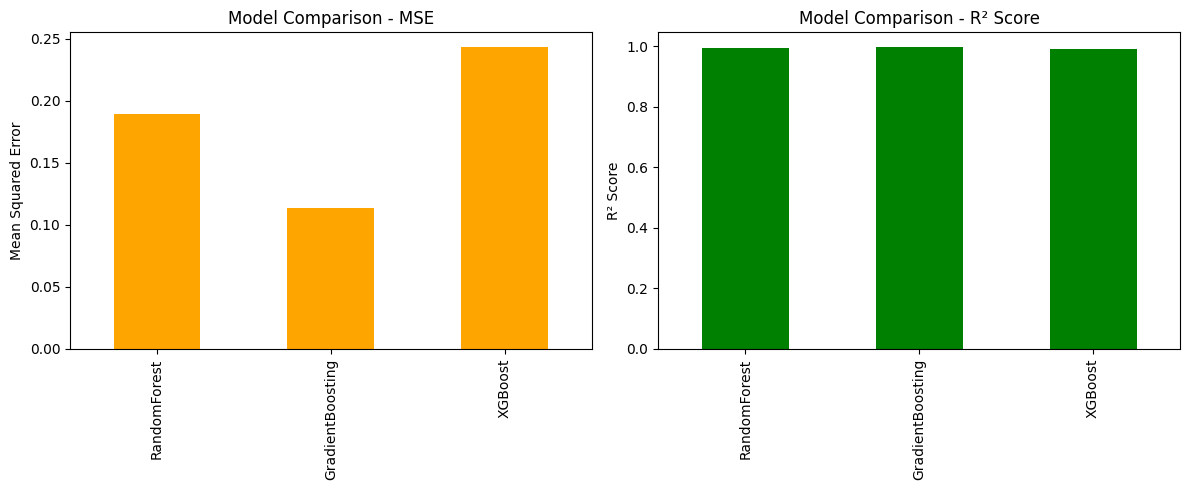

In [ ]:
# ===============================
# CityPulse - Model Comparison
# RandomForest vs GradientBoosting vs XGBoost
# ===============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# 1. Create Synthetic Dataset
# -------------------------------
np.random.seed(42)

n = 1000  # increase dataset size for better learning
data = {
    "green_cover": np.random.uniform(10, 60, n),         # percentage
    "traffic_congestion": np.random.uniform(10, 120, n), # min/km delay
    "waste_generation": np.random.uniform(0.2, 2.5, n),  # kg/person/day
    "energy_consumption": np.random.uniform(500, 3000, n), # kWh/person/year
}

df = pd.DataFrame(data)

# Synthetic scoring formula
df["city_health_score"] = (
    0.4 * df["green_cover"]
    - 0.3 * df["traffic_congestion"] / 10
    - 0.2 * df["waste_generation"] * 10
    - 0.1 * df["energy_consumption"] / 500
) + 50

# -------------------------------
# 2. Train-Test Split & Scaling
# -------------------------------
X = df.drop("city_health_score", axis=1)
y = df["city_health_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 3. Train Models
# -------------------------------
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                                  max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5,
                            subsample=0.8, colsample_bytree=0.8, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# -------------------------------
# 4. Compare Results
# -------------------------------
results_df = pd.DataFrame(results).T
print("🔹 Model Performance Comparison:\n")
print(results_df)

# -------------------------------
# 5. Visualization
# -------------------------------
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot MSE
results_df["MSE"].plot(kind="bar", ax=ax[0], color="orange")
ax[0].set_title("Model Comparison - MSE")
ax[0].set_ylabel("Mean Squared Error")

# Plot R²
results_df["R2"].plot(kind="bar", ax=ax[1], color="green")
ax[1].set_title("Model Comparison - R² Score")
ax[1].set_ylabel("R² Score")

plt.tight_layout()
plt.show()


🔹 Gradient Boosting Model Performance:
Mean Squared Error (MSE): 0.11
R² Score: 0.9968

🔹 Enter City Parameters to Calculate AI Score:
Enter Green Cover (%) : 35
Enter Traffic Congestion (min/km) : 40
Enter Waste Generation (kg/person/day) : 100
Enter Energy Consumption (kWh/person/year) : 5

✅ Predicted Sustainable Growth Index (City Health Score): 57.76


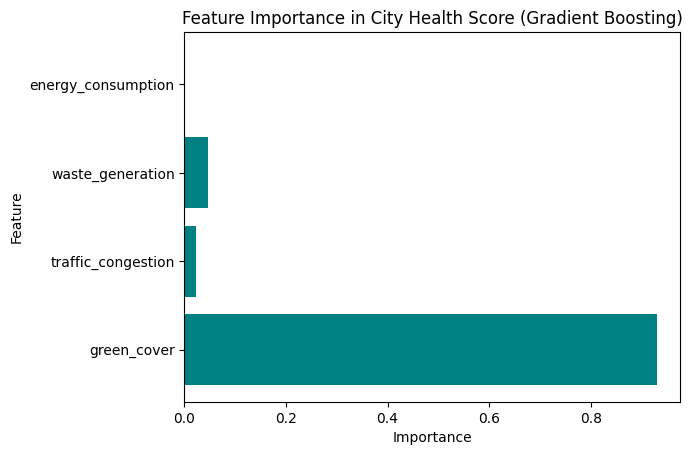

In [ ]:
# ===============================
# CityPulse - AI Scoring (Final Model with Gradient Boosting)
# ===============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------------
# 1. Create Synthetic Dataset
# -------------------------------
np.random.seed(42)

n = 1000  # larger dataset for better learning
data = {
    "green_cover": np.random.uniform(10, 60, n),         # percentage
    "traffic_congestion": np.random.uniform(10, 120, n), # min/km delay
    "waste_generation": np.random.uniform(0.2, 2.5, n),  # kg/person/day
    "energy_consumption": np.random.uniform(500, 3000, n), # kWh/person/year
}

df = pd.DataFrame(data)

# Synthetic City Health Score formula
df["city_health_score"] = (
    0.4 * df["green_cover"]
    - 0.3 * df["traffic_congestion"] / 10
    - 0.2 * df["waste_generation"] * 10
    - 0.1 * df["energy_consumption"] / 500
) + 50

# -------------------------------
# 2. Train-Test Split & Scaling
# -------------------------------
X = df.drop("city_health_score", axis=1)
y = df["city_health_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 3. Train Gradient Boosting Model
# -------------------------------
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbr.fit(X_train_scaled, y_train)

# -------------------------------
# 4. Evaluate Model Performance
# -------------------------------
y_pred = gbr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔹 Gradient Boosting Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# -------------------------------
# 5. Take User Input & Predict
# -------------------------------
print("\n🔹 Enter City Parameters to Calculate AI Score:")

green_cover = float(input("Enter Green Cover (%) : "))
traffic_congestion = float(input("Enter Traffic Congestion (min/km) : "))
waste_generation = float(input("Enter Waste Generation (kg/person/day) : "))
energy_consumption = float(input("Enter Energy Consumption (kWh/person/year) : "))

# Prepare input
user_city = pd.DataFrame({
    "green_cover": [green_cover],
    "traffic_congestion": [traffic_congestion],
    "waste_generation": [waste_generation],
    "energy_consumption": [energy_consumption],
})

# Scale & Predict
user_city_scaled = scaler.transform(user_city)
predicted_score = gbr.predict(user_city_scaled)

print("\n✅ Predicted Sustainable Growth Index (City Health Score):", round(predicted_score[0], 2))

# -------------------------------
# 6. Feature Importance
# -------------------------------
importances = gbr.feature_importances_
features = X.columns

plt.barh(features, importances, color="teal")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in City Health Score (Gradient Boosting)")
plt.show()




In [ ]:
import joblib

# Save Gradient Boosting model and scaler
joblib.dump(gbr, "citypulse_gbr_model.pkl")
joblib.dump(scaler, "citypulse_scaler.pkl")

print("✅ Gradient Boosting Model & Scaler saved successfully!")


✅ Gradient Boosting Model & Scaler saved successfully!
